# Introduction
In this project, our objective is to predict whether a client will subscribe to a term deposit or not. Using collected data through multiple contacts to people, we help the bank to have a targeted marketing for potential customers by using ML classification approaches. This data includes both numerical and categorical features from the potential clients. In what follows, we first look at the data in more detail and visualize its different components to have a better understanding of the problem. Then, we clean the data and apply feature engineering to make the data in a proper format for ML algorithms.Next, we apply different ML classification methods and study their performance through various metrics. Finally, we refine the features and select the most important features to minimize bias and variance of the classifiers and select the most appropriate approach for this context.

# Data Exploration

The data can be found in UC Irvine ML dataset repository with this link https://archive.ics.uci.edu/dataset/222/bank+marketing. The source files are in csv format and there exists different versions of the dataset ranging from older to newer ones. The most recent dataset includes the largest number of features and data instances from the candidates.

## Data Features Explained
The data features are as follows:

1 - age (numeric)

2 - job : type of job (categorical)

3 - marital : marital status (categorical)

4 - education (categorical)

5 - default: has credit in default? (binary: "yes","no")
   
6 - balance: average yearly balance, in euros (numeric)
   
7 - housing: has housing loan? (binary: "yes","no")
   
8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Data Import

We import the data for further exploration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, we import an older version:

In [2]:
dataset1 = pd.read_csv("/content/bank-full.csv", delimiter= ";")
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Now, let's check the most recent dataset.

In [3]:
dataset2 = pd.read_csv("/content/bank-additional-full.csv", delimiter= ";")
dataset2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


For the new dataset, we do not see the average yearly balance (balance) as a feature. This might be due to reluctance of the people to give an exact answer, therefore we ignore this data component. On the other hand, we see new features in the new dataset:

a. emp.var.rate: employment variation rate

b. cons.price.idx: consumer price index

c. cons.conf.idx: consumer confidence index

d. euribor3m: 3-month Euribor interest rate

e. nr.employed: number of employees in the bank



# Data Visulization

We use visualization techniques to gain insight on different features of the data. We first focus on numerical features.
## Numerical Features
First, we check if there are any missing values for the numerical features and then we plot their distribution.

In [4]:
num_features = ["age", "emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"]
dataset2[num_features].isnull().sum()

age               0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

<ipython-input-5-8c6bb8e9c76d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset2["age"], ax = axs[0,0])
<ipython-input-5-8c6bb8e9c76d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset2["emp.var.rate"], ax = axs[0,1])
<ipython-input-5-8c6bb8e9c76d>:14: UserWarning: 

`distplot` i

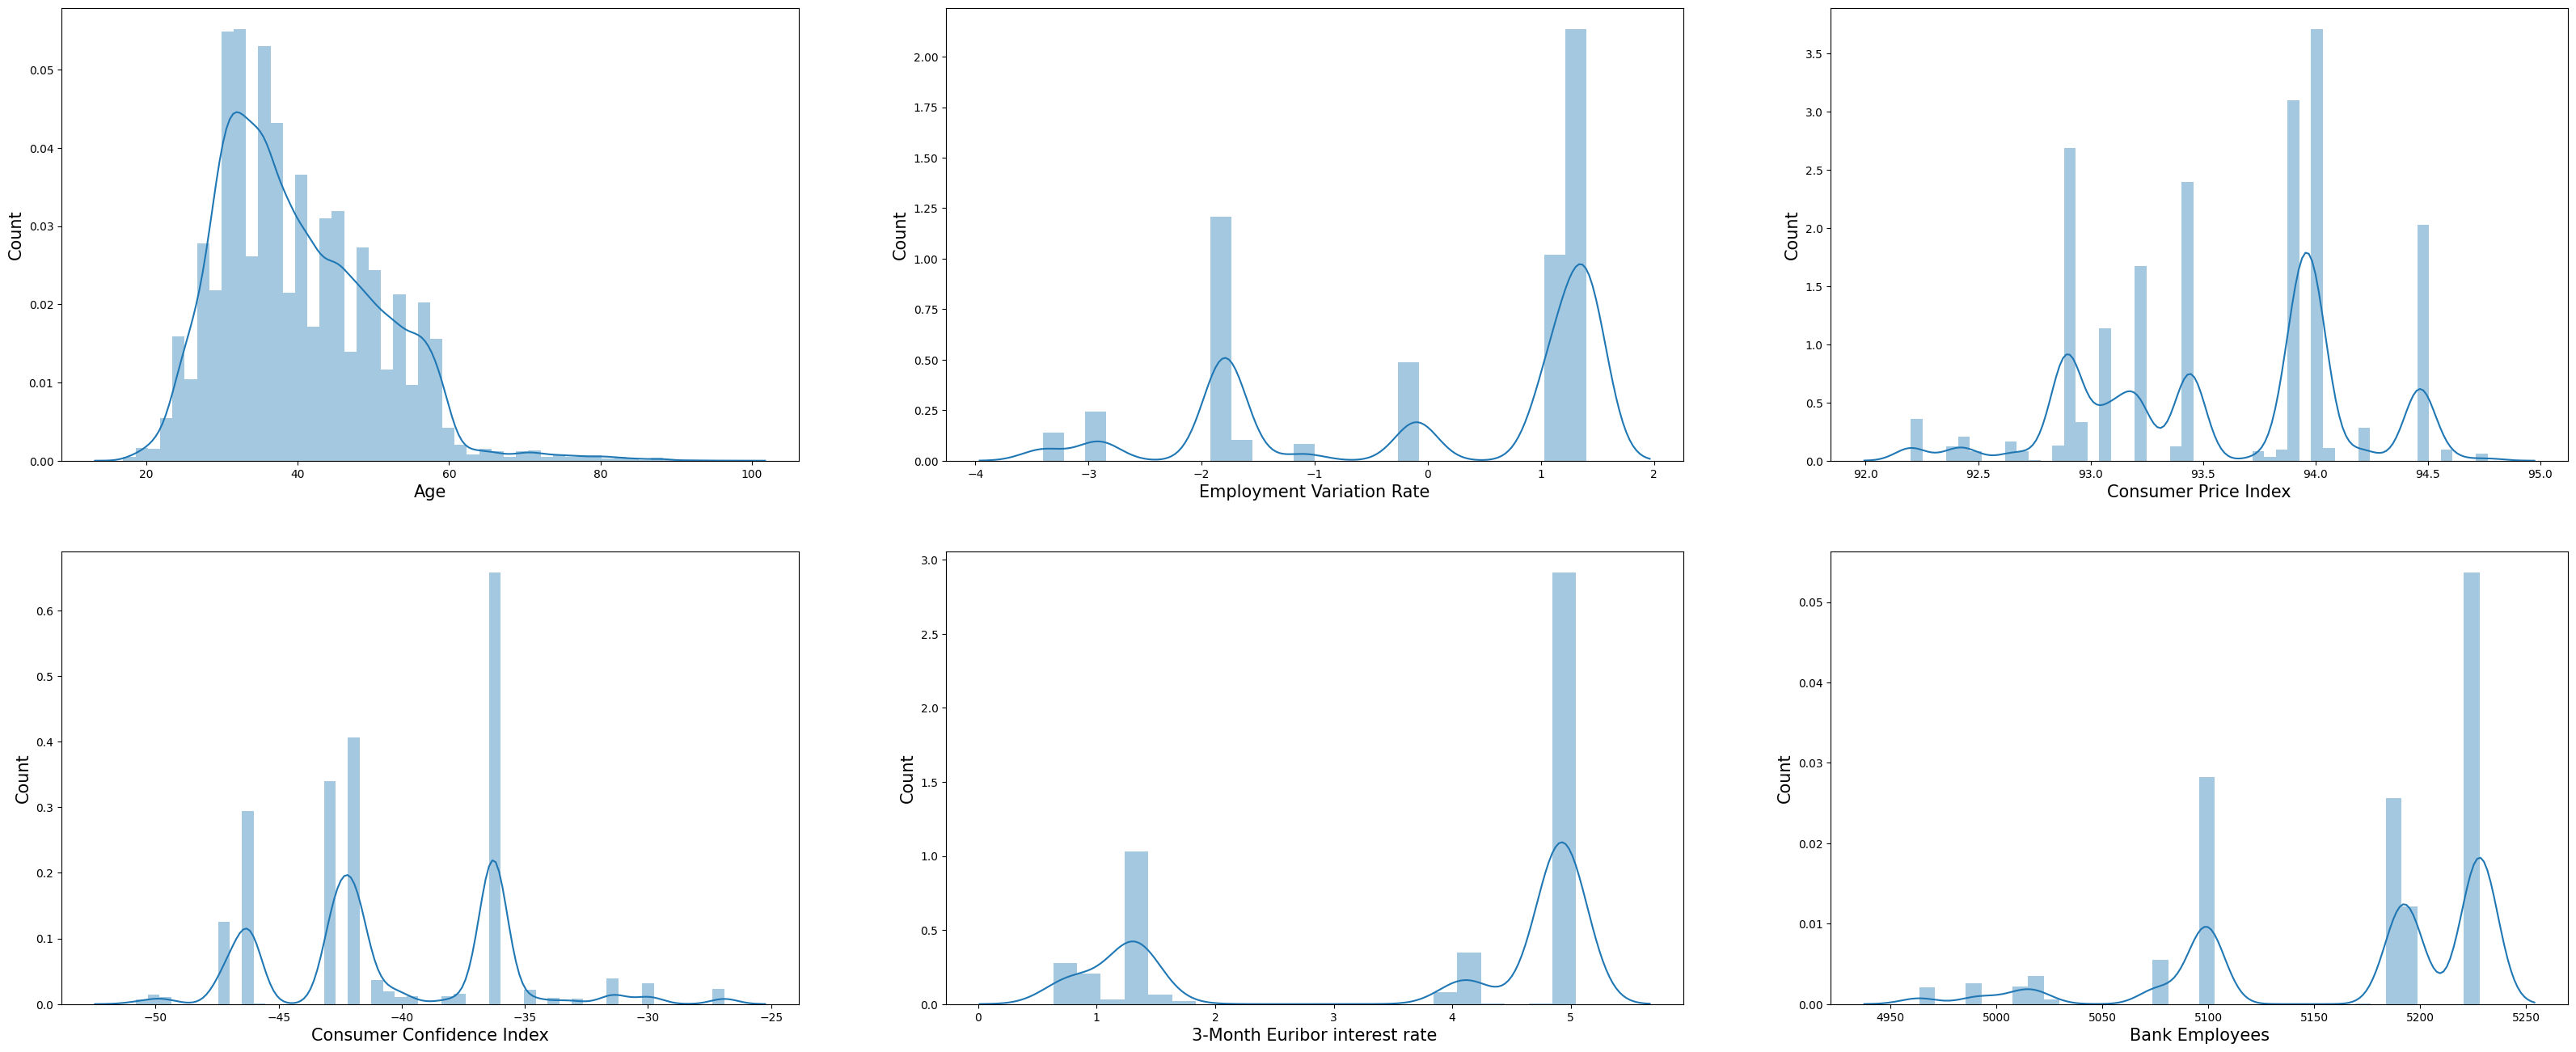

In [5]:
# There is no missing values in the numerical features, so let's plot their distribution.
import seaborn as sns

fig, axs = plt.subplots(nrows = 2, ncols = 3)

sns.distplot(dataset2["age"], ax = axs[0,0])
axs[0,0].set_xlabel("Age", fontsize = 15)
axs[0,0].set_ylabel("Count", fontsize = 15)

sns.distplot(dataset2["emp.var.rate"], ax = axs[0,1])
axs[0,1].set_xlabel("Employment Variation Rate", fontsize = 15)
axs[0,1].set_ylabel("Count", fontsize = 15)

sns.distplot(dataset2["cons.price.idx"], ax = axs[0,2])
axs[0,2].set_xlabel("Consumer Price Index", fontsize = 15)
axs[0,2].set_ylabel("Count", fontsize = 15)

sns.distplot(dataset2["cons.conf.idx"], ax = axs[1,0])
axs[1,0].set_xlabel("Consumer Confidence Index", fontsize = 15)
axs[1,0].set_ylabel("Count", fontsize = 15)

sns.distplot(dataset2["euribor3m"], ax = axs[1,1])
axs[1,1].set_xlabel("3-Month Euribor interest rate", fontsize = 15)
axs[1,1].set_ylabel("Count", fontsize = 15)

sns.distplot(dataset2["nr.employed"], ax = axs[1,2])
axs[1,2].set_xlabel("Bank Employees", fontsize = 15)
axs[1,2].set_ylabel("Count", fontsize = 15)


fig.set_size_inches(40, 16)
plt.show()

We observe that age of the candidates is densly distributed between 20 to 60 years. For the remaining 5 plots, we observe several modes.

To make the numerical futures in proper form for ML algorithms, we scale their values. In this project, we use StandardScalar.

In [6]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
num_cols = std_scalar.fit_transform(dataset2[num_features])

# We convert num_cols numpy.array to dataframe
num_cols_scaled = pd.DataFrame(num_cols, columns = dataset2[num_features].columns,
                               index = dataset2.index)
num_cols_scaled.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.648092,0.722722,0.886447,0.71246,0.33168


## Categorical Features

Let's see the distribution of categorical features.

In [7]:
# check for missing values
cat_features = ["job",	"marital",	"education", "default",	"housing",	"loan",	"contact",	"month"]
dataset2[cat_features].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
dtype: int64

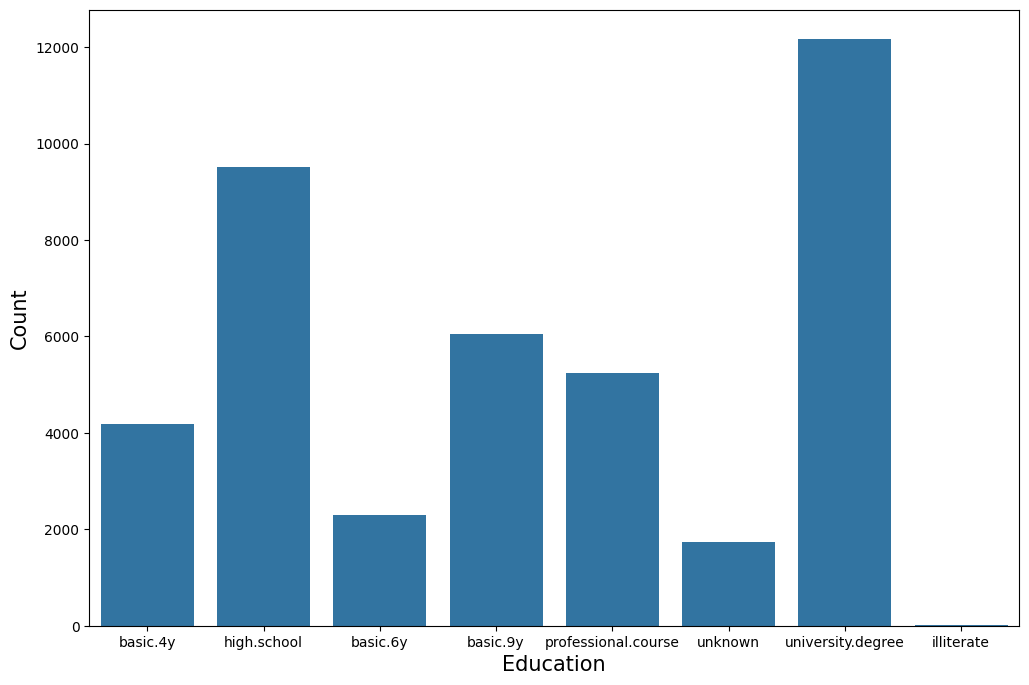

In [8]:
fig, axs = plt.subplots()

sns.countplot(data = dataset2, x="education")
axs.set_xlabel("Education", fontsize = 15)
axs.set_ylabel("Count", fontsize = 15)
fig.set_size_inches(12, 8)
plt.show()

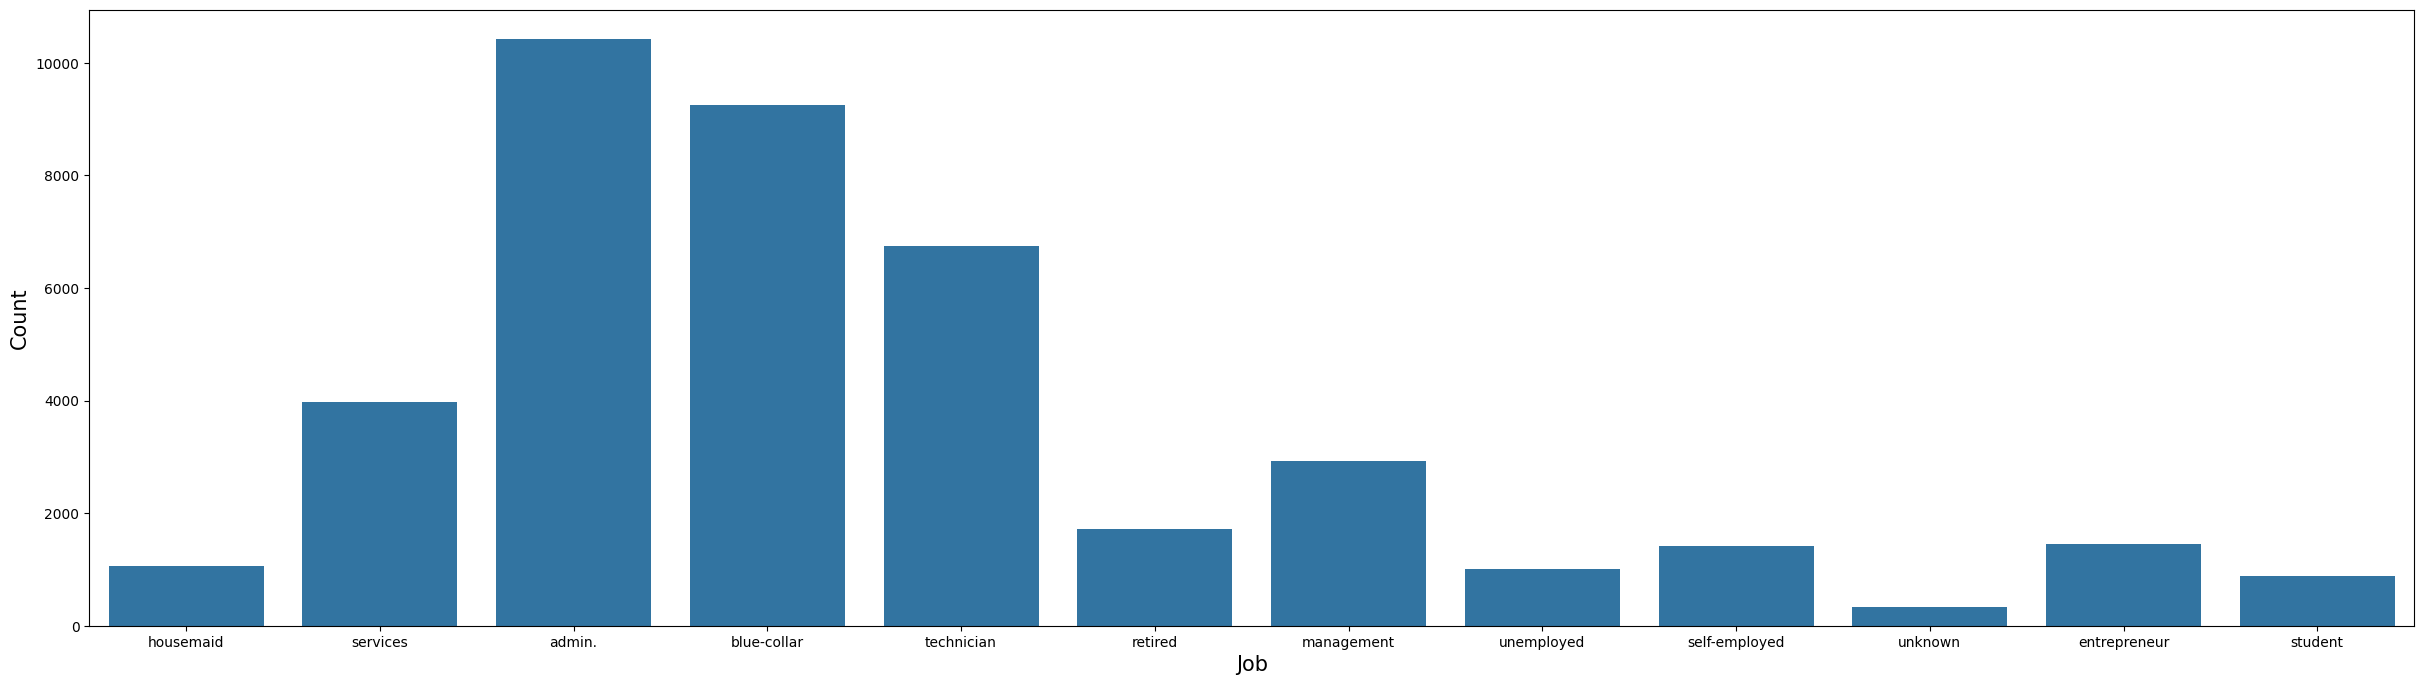

In [9]:
fig, axs = plt.subplots()

sns.countplot(data = dataset2, x="job")
axs.set_xlabel("Job", fontsize = 15)
axs.set_ylabel("Count", fontsize = 15)
fig.set_size_inches(30, 8)
plt.show()

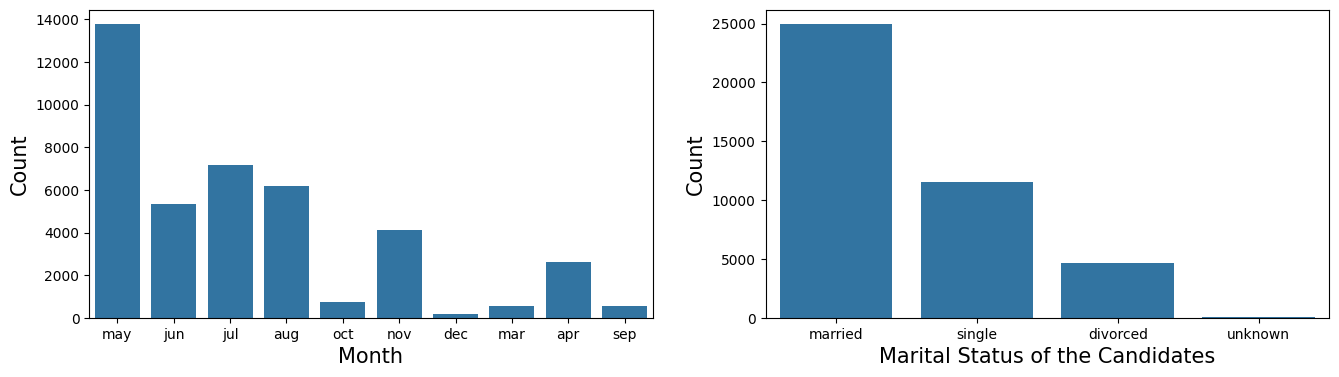

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols = 2)

sns.countplot(x = "month", data =  dataset2, ax = axs[0])
axs[0].set_xlabel("Month", fontsize = 15)
axs[0].set_ylabel("Count", fontsize = 15)

sns.countplot(x = "marital", data =  dataset2, ax = axs[1])
axs[1].set_xlabel("Marital Status of the Candidates", fontsize = 15)
axs[1].set_ylabel("Count", fontsize = 15)

fig.set_size_inches(16, 4)
plt.show()

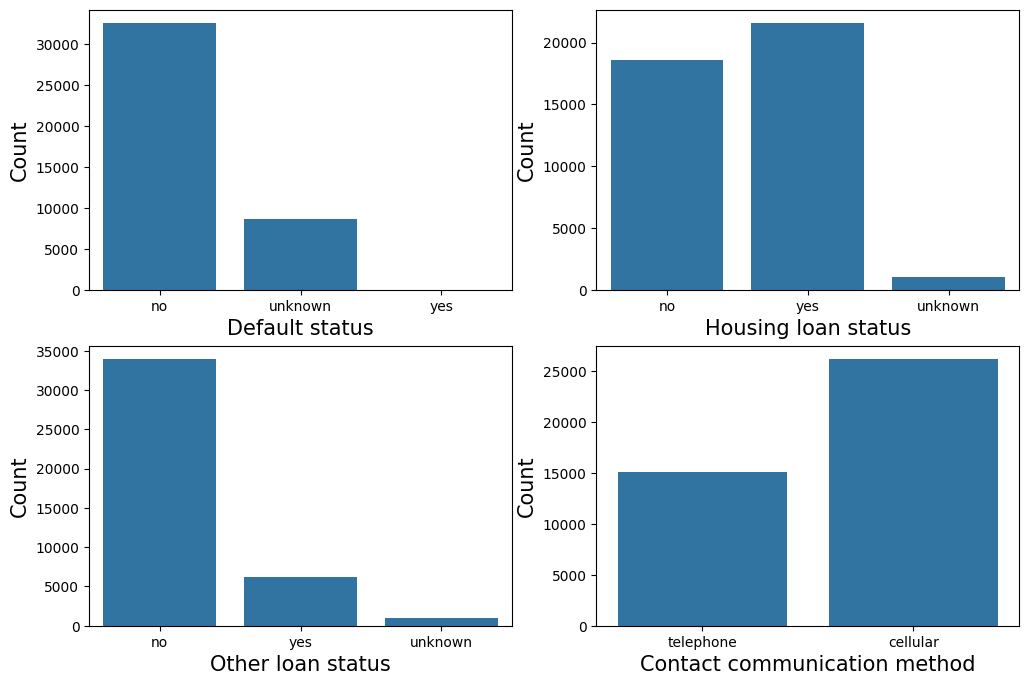

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)

sns.countplot(x = "default", data =  dataset2, ax = axs[0,0])
axs[0,0].set_xlabel("Default status", fontsize = 15)
axs[0,0].set_ylabel("Count", fontsize = 15)

sns.countplot(x = "housing", data =  dataset2, ax = axs[0,1])
axs[0,1].set_xlabel("Housing loan status", fontsize = 15)
axs[0,1].set_ylabel("Count", fontsize = 15)

sns.countplot(x ="loan", data =  dataset2, ax = axs[1,0])
axs[1,0].set_xlabel("Other loan status", fontsize = 15)
axs[1,0].set_ylabel("Count", fontsize = 15)

sns.countplot(x = "contact", data =  dataset2, ax = axs[1,1])
axs[1,1].set_xlabel("Contact communication method", fontsize = 15)
axs[1,1].set_ylabel("Count", fontsize = 15)

fig.set_size_inches(12,8)
plt.show()

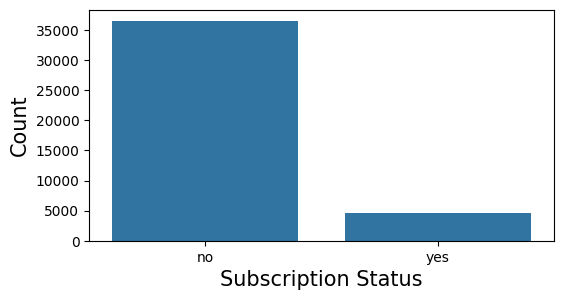

In [11]:
fig, axs = plt.subplots()

sns.countplot(data = dataset2, x="y")
axs.set_xlabel("Subscription Status", fontsize = 15)
axs.set_ylabel("Count", fontsize = 15)
fig.set_size_inches(6, 3)
plt.show()

Given the distribution of the categorical data, we will take the following steps and assumptions to prepare the data for the classification algorithms:

1. For each feature the unknown data is imputed to the "most_frequent" feature.

2. Then, all the categorical features (with imputation) are One-hot encoded to have numerical values.

3. Features with "yes" and "no" are transformed to 1 and 0 (including the labels), respectively.

4. Since the number of people who have not subscribed to the term deposit is much higher than those who have, we must balance the data to prevent bias in the ML algorithms. Therefore, we prepare the test_train dataset such that we have equal number of both classes.



Before, applying these transformation, let's check the dependence of categorical features and the label by using Chi-Square test. See the following link for more info: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

We state the null hypotheis for each categorical column "c" as:

H0: There is no dependence between feature in column "c" and the labels.

In [12]:
import scipy.stats as stats

for c in cat_features:
  # MAke contigency table
  temp_contingency_table = pd.crosstab(dataset2[c], dataset2['y'])
  # Perform Chi-Square test
  chi2, p, dof, expected = stats.chi2_contingency(temp_contingency_table)

  print(c + " has p-value " + str(p) + " with Chi2 value " + str(chi2))

job has p-value 4.189763287563623e-199 with Chi2 value 961.2424403289555
marital has p-value 2.068014648442211e-26 with Chi2 value 122.65515182252989
education has p-value 3.3051890144025054e-38 with Chi2 value 193.10590454149565
default has p-value 5.1619579513916376e-89 with Chi2 value 406.5775146420093
housing has p-value 0.05829447669453452 with Chi2 value 5.684495858974168
loan has p-value 0.5786752870441754 with Chi2 value 1.094027551150338
contact has p-value 1.5259856523129964e-189 with Chi2 value 862.3183642075705
month has p-value 0.0 with Chi2 value 3101.149351411678


We see that the "has other loan?" feature has a very small Chi2 value which indicates that this feature does not influence the target values by a high probability.

In [13]:
# copy categorical features without loan feature
cat_features = ["job",	"marital",	"education", "default",	"housing", "contact",	"month"]
cat_cols = dataset2[cat_features].copy()

# Replace the unknown values with the most frequent ones
for col in cat_cols.columns:
  cat_cols[col] = cat_cols[col].replace({"unknown":cat_cols[col].value_counts().index[0]})

cat_cols_onehot = pd.get_dummies(cat_cols, drop_first = "False", dtype='int')

# Convert labels
labels = dataset2["y"].replace({"yes": 1, "no": 0})

# Concatenate all features
dataset = pd.concat([num_cols_scaled, cat_cols_onehot, labels], axis = 1)

dataset.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,1.533034,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.628993,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.290186,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.002309,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.533034,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Preparation of Train and Test Set

We do the following steps:

1. Make an dataset_main that has equal numberss of both classes. To do this, we select a random subset of data instances with label "0" (which has larger instances) and combine it with the other class.

2. Take 20% of original_dataset as test set.

3. Separate the predictors from the labels.

In [14]:
# separate data with label 0 and label 1
data_label_0 = dataset[dataset["y"] == 0]
data_label_1 = dataset[dataset["y"] == 1]
label_1_Count = data_label_1.shape[0]

# Select a random subset of data with label 0 that has equal instances as of those with label 1
data_label_0_aug = data_label_0.sample(n = label_1_Count, random_state = 42)

# Concatenate both labels
temp_dataset = pd.concat([data_label_1, data_label_0_aug])

# Shuffle the rows with method "sample" and drop the old indices
dataset_main = temp_dataset.sample(frac = 1, random_state = 42)
dataset_main = dataset_main.reset_index(drop = True)
dataset_main.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,0.957281,-0.115781,-0.649003,-0.323542,0.230456,0.398115,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2.108788,-0.752343,2.058168,-2.224953,-1.493457,-2.815697,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.861322,-1.197935,-0.357036,1.232158,-1.711973,-2.191481,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.861322,0.839061,-0.227465,0.951267,0.773575,0.845170,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.865939,0.839061,-0.227465,0.951267,0.773575,0.845170,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Now, we split the data for train and test.

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset_main, test_size = 0.2, random_state = 42)

X_train = train_set.drop("y", axis = 1)
y_train = train_set["y"].copy()

X_test = test_set.drop("y", axis = 1)
y_test = test_set["y"].copy()


# Classification Models

We evaluate the performance of each method with the following metrics:

a. accuracy score

b. precision

c. recall

d. are under roc curve

We define a function to show these performance metrics.





In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def show_performsnce_metrics(y_label, y_pred, thresh):
  accuracy = accuracy_score(y_label, (y_pred > thresh))
  auc = roc_auc_score(y_label, y_pred)
  precision = precision_score(y_label, (y_pred > thresh))
  recall = recall_score(y_label, (y_pred > thresh))

  print("Accuracy is %.3f" %accuracy)
  print("AUC is %.3f" %auc)
  print("Precision is %.3f" %precision)
  print("Recall is %.3f" %recall)
  print(" ")

  return accuracy, auc, precision, recall

We focus on several on the following classifiers:

1. Logistic Regression
2. SGD Classifier
3. K Neares Nesighbor (KNN)
4. Random Forest Classifier
5. Gradient Boositng
6. Neural Network


###Logistic Regression

In [17]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

thresh = 0.5

# Logistic Regression Classifier
lr_clf = LogisticRegression(random_state = 42)
lr_clf.fit(X_train, y_train)
y_prob_valid_lr = cross_val_predict(lr_clf, X_train, y_train, cv = 3,
                                method = "predict_proba")


y_prob_train_lr = lr_clf.predict_proba(X_train)[:,1]

print("Logisitic Regression Training")
accuracy_train_lr, auc_train_lr, precision_train_lr, recall_train_lr = show_performsnce_metrics(y_train, y_prob_train_lr, thresh)

print("Logisitic Regression Validation")
accuracy_valid_lr, auc_valid_lr, precision_valid_lr, recall_valid_lr = show_performsnce_metrics(y_train, y_prob_valid_lr[:,1], thresh)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logisitic Regression Training
Accuracy is 0.736
AUC is 0.785
Precision is 0.818
Recall is 0.606
 
Logisitic Regression Validation
Accuracy is 0.735
AUC is 0.780
Precision is 0.816
Recall is 0.606
 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K Nearest Neighbor

In [18]:
# Knn Classifier
knn_clf = KNeighborsClassifier(n_neighbors = 50)
knn_clf.fit(X_train, y_train)
y_prob_valid_knn = cross_val_predict(knn_clf, X_train, y_train, cv = 3,
                                method = "predict_proba")

y_prob_train_knn = knn_clf.predict_proba(X_train)[:,1]

print("KNN Classifier Training")
accuracy_train_knn, auc_train_knn, precision_train_knn, recall_train_knn = show_performsnce_metrics(y_train, y_prob_train_knn, thresh)

print("SGD Classifier Validation")
accuracy_valid_knn, auc_valid_knn, precision_valid_knn, recall_valid_knn = show_performsnce_metrics(y_train, y_prob_valid_knn[:,1], thresh)


KNN Classifier Training
Accuracy is 0.737
AUC is 0.796
Precision is 0.821
Recall is 0.605
 
SGD Classifier Validation
Accuracy is 0.728
AUC is 0.771
Precision is 0.807
Recall is 0.600
 


### SGD Classifier Performance Metrics

In [19]:
thresh = 0.5

# SGD Classifier
sgd_clf = SGDClassifier(loss = "log", random_state = 42)
sgd_clf.fit(X_train, y_train)
y_prob_valid_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv = 3,
                                method = "predict_proba")

y_prob_train_sgd = sgd_clf.predict_proba(X_train)[:,1]

print("SGD Classifier Training")
accuracy_train_sgd, auc_train_sgd, precision_train_sgd, recall_train_sgd = show_performsnce_metrics(y_train, y_prob_train_sgd, thresh)

print("SGD Classifier Validation")
accuracy_valid_sgd, auc_valid_sgd, precision_valid_sgd, recall_valid_sgd = show_performsnce_metrics(y_train, y_prob_valid_sgd[:,1], thresh)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGD Classifier Training
Accuracy is 0.720
AUC is 0.768
Precision is 0.779
Recall is 0.614
 
SGD Classifier Validation
Accuracy is 0.713
AUC is 0.752
Precision is 0.772
Recall is 0.604
 


### Random Forest Classifier Performance Metrics

In [20]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(max_depth = 6, random_state = 42)
rf_clf.fit(X_train, y_train)
y_prob_valid_rf = cross_val_predict(rf_clf, X_train, y_train, cv = 3,
                                method = "predict_proba")

thresh = 0.5
y_prob_train_rf = rf_clf.predict_proba(X_train)[:,1]

print("Random Forest Training")
accuracy_train_rf, auc_train_rf, precision_train_rf, recall_train_rf = show_performsnce_metrics(y_train, y_prob_train_rf, thresh)

print("Random Forest Validation")
accuracy_valid_rf, auc_valid_rf, precision_valid_rf, recall_valid_rf = show_performsnce_metrics(y_train, y_prob_valid_rf[:,1], thresh)

Random Forest Training
Accuracy is 0.739
AUC is 0.807
Precision is 0.818
Recall is 0.615
 
Random Forest Validation
Accuracy is 0.738
AUC is 0.784
Precision is 0.815
Recall is 0.616
 


### Gradient Boosting Classifier

In [21]:
thresh = 0.5

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1,
                                    max_depth = 6, random_state = 42)
gb_clf.fit(X_train, y_train)
y_prob_valid_gb = cross_val_predict(gb_clf, X_train, y_train, cv = 3,
                                method = "predict_proba")
y_prob_train_gb = gb_clf.predict_proba(X_train)[:,1]

print("Gradient Boosting Training")
accuracy_train_gb, auc_train_gb, precision_train_gb, recall_train_gb = show_performsnce_metrics(y_train, y_prob_train_gb, thresh)

print("Gradient Boosting Validation")
accuracy_valid_gb, auc_valid_gb, precision_valid_gb, recall_valid_gb = show_performsnce_metrics(y_train, y_prob_valid_gb[:,1], thresh)

Gradient Boosting Training
Accuracy is 0.902
AUC is 0.968
Precision is 0.932
Recall is 0.867
 
Gradient Boosting Validation
Accuracy is 0.664
AUC is 0.714
Precision is 0.665
Recall is 0.657
 


Multi-Layer Perceptron:

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes = (100, ), max_iter = 300,
                        alpha = 0.0001, solver = 'adam', random_state = 42, tol = 0.0001)

mlp_clf.fit(X_train, y_train)
y_prob_valid_mlp = cross_val_predict(mlp_clf, X_train, y_train, cv = 3,
                                method = "predict_proba")
y_prob_train_mlp = mlp_clf.predict_proba(X_train)[:,1]

print("MLP Classifier Training")
accuracy_train_mlp, auc_train_mlp, precision_train_mlp, recall_train_mlp = show_performsnce_metrics(y_train, y_prob_train_mlp, thresh)

print("MLP Classifier Validation")
accuracy_valid_mlp, auc_valid_mlp, precision_valid_mlp, recall_valid_mlp = show_performsnce_metrics(y_train, y_prob_valid_mlp[:,1], thresh)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Training
Accuracy is 0.791
AUC is 0.877
Precision is 0.853
Recall is 0.705
 
MLP Classifier Validation
Accuracy is 0.694
AUC is 0.745
Precision is 0.713
Recall is 0.649
 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


We collect the results of the classifiers as follows:

In [23]:
train_lr = np.array([accuracy_train_lr, auc_train_lr, precision_train_lr, recall_train_lr])
valid_lr = np.array([accuracy_valid_lr, auc_valid_lr, precision_valid_lr, recall_valid_lr])

train_knn = np.array([accuracy_train_knn, auc_train_knn, precision_train_knn, recall_train_knn])
valid_knn = np.array([accuracy_valid_knn, auc_valid_knn, precision_valid_knn, recall_valid_knn])

train_sgd = np.array([accuracy_train_sgd, auc_train_sgd, precision_train_sgd, recall_train_sgd])
valid_sgd = np.array([accuracy_valid_sgd, auc_valid_sgd, precision_valid_sgd, recall_valid_sgd])

train_rf = np.array([accuracy_train_rf, auc_train_rf, precision_train_rf, recall_train_rf])
valid_rf = np.array([accuracy_valid_rf, auc_valid_rf, precision_valid_rf, recall_valid_rf])

train_gb = np.array([accuracy_train_gb, auc_train_gb, precision_train_gb, recall_train_gb])
valid_gb = np.array([accuracy_valid_gb, auc_valid_gb, precision_valid_gb, recall_valid_gb])

train_mlp = np.array([accuracy_train_mlp, auc_train_mlp, precision_train_mlp, recall_train_mlp])
valid_mlp = np.array([accuracy_valid_mlp, auc_valid_mlp, precision_valid_mlp, recall_valid_mlp])

train_results = np.array([np.concatenate([train_lr, valid_lr], axis = 0),
                          np.concatenate([train_knn, valid_knn], axis = 0),
                          np.concatenate([train_sgd, valid_sgd], axis = 0),
                          np.concatenate([train_rf, valid_rf], axis = 0),
                          np.concatenate([train_gb, valid_gb], axis = 0),
                          np.concatenate([train_mlp,valid_mlp], axis = 0)])

initialResults = pd.DataFrame(train_results,
                              columns = ["accuracy_train", "AUC_train", " Precision_train", "Recall_train",
                                         "accuracy_valid", "AUC_valid", " Precision_valid", "Recall_valid"],
                              index = ["Logistic Regression", "KNN", "SGD", "Random Forest", "Gradient Boosting", "MLP"])
initialResults

,accuracy_train,AUC_train,Precision_train,Recall_train,accuracy_valid,AUC_valid,Precision_valid,Recall_valid
Logistic Regression,0.735722,0.785106,0.817752,0.606093,0.734510,0.779784,0.815541,0.605554
KNN,0.736800,0.795838,0.821076,0.605015,0.728314,0.771225,0.806967,0.599623
SGD,0.719962,0.768138,0.778728,0.613912,0.712958,0.752367,0.771507,0.604476
Random Forest,0.739494,0.806668,0.818443,0.614991,0.738012,0.784471,0.814775,0.615530
Gradient Boosting,0.901805,0.968395,0.931634,0.867080,0.663524,0.714413,0.665211,0.657320
MLP,0.791487,0.876750,0.852529,0.704503,0.693966,0.745225,0.712763,0.648962


We observe that the Logistic Regression, KNN and the SGD Classifier give nearly the same accuracy for both the training and validation set (which indicates no sign of high variance).

On the other hand, Gradient Boosting and MLP have relatively high performance metrics in the training set. However, their performance drops in the validation set which is a sign of high variance.

Next, we focus on both Gradient Boosting and MLP and investigate the effect of hyperparameter tuning to enahnce their performance.

# Hyperparameter Tuning

## Gradient Boosting Classifier

For this classifier, we study the effect of the following parameters:

a. n_estimator: number of estimators

b. learning_rate

c. min_samples_split: The minimum number of samples required to split an internal node.

d. min_samples_leaf: The minimum number of samples required to be at a leaf node.

e. max_depth


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50,200),
    'learning_rate': uniform(0.01,1),
    'max_depth': randint(3,6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1,5)
}

clf_gc_hpt = GradientBoostingClassifier(random_state = 42)

grid_search = RandomizedSearchCV(estimator = clf_gc_hpt, param_distributions = param_dist, cv = 5,
                           n_iter = 10, n_jobs = -1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'learning_rate': 0.05700558265019883, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 71}
Best Score: 0.7363968526232677


## MLP Classifier

We tune the following parameters for the MLP classifier:

1. hidden_layer_sizes

2. alpha: Regularization parameter

3. learning_rate

4. max_iter

5. solver



In [30]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 100)],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': uniform(0.001,0.1),
    'alpha': uniform(0.0001,0.01),
    'max_iter': randint(100, 500),
    'solver': ['sgd', 'adam'],
    'activation': ['relu']
}

clf_mlp_hpt = MLPClassifier(random_state = 42)

grid_search_mlp = RandomizedSearchCV(estimator = clf_mlp_hpt, param_distributions = param_dist, cv = 5,
                           n_iter = 10, n_jobs = -1, random_state = 42)

grid_search_mlp.fit(X_train, y_train)

best_params = grid_search_mlp.best_params_
best_score = grid_search_mlp.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'activation': 'relu', 'alpha': 0.009588855372533333, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.08183973481164612, 'max_iter': 364, 'solver': 'adam'}
Best Score: 0.7334331636218429


Given the tuned hyperparameters for the gradient boosting classifier and MLP classifier, we update the table of results.

In [25]:
thresh = 0.5

# Updated: Gradient Boosting Classifier
gb_clf_updated = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.42,
                                    max_depth = 2, min_samples_leaf = 2, min_samples_split = 3, random_state = 42)
gb_clf_updated.fit(X_train, y_train)
y_prob_valid_gb_updated = cross_val_predict(gb_clf_updated, X_train, y_train, cv = 3,
                                method = "predict_proba")
y_prob_train_gb_updated = gb_clf_updated.predict_proba(X_train)[:,1]

print("Gradient Boosting Training")
accuracy_train_gb_new, auc_train_gb_new, precision_train_gb_new, recall_train_gb_new = show_performsnce_metrics(y_train, y_prob_train_gb_updated, thresh)

print("Gradient Boosting Validation")
accuracy_valid_gb_new, auc_valid_gb_new, precision_valid_gb_new, recall_valid_gb_new = show_performsnce_metrics(y_train, y_prob_valid_gb_updated[:,1], thresh)



Gradient Boosting Training
Accuracy is 0.744
AUC is 0.810
Precision is 0.821
Recall is 0.624
 
Gradient Boosting Validation
Accuracy is 0.735
AUC is 0.786
Precision is 0.808
Recall is 0.617
 


In [26]:
# Updated: MLP Classifier
mlp_clf_updated = MLPClassifier(hidden_layer_sizes = (100, 50), max_iter = 350, alpha = 0.01, activation = "relu",
                        learning_rate = "adaptive", learning_rate_init = 0.08, solver = 'adam', random_state = 42, tol = 0.0001)

mlp_clf_updated.fit(X_train, y_train)
y_prob_valid_mlp_updated = cross_val_predict(mlp_clf_updated, X_train, y_train, cv = 3,
                                method = "predict_proba")
y_prob_train_mlp_updated = mlp_clf_updated.predict_proba(X_train)[:,1]

print("MLP Classifier Training")
accuracy_train_mlp_new, auc_train_mlp_new, precision_train_mlp_new, recall_train_mlp_new = show_performsnce_metrics(y_train, y_prob_train_mlp_updated, thresh)

print("MLP Classifier Validation")
accuracy_valid_mlp_new, auc_valid_mlp_new, precision_valid_mlp_new, recall_valid_mlp_new = show_performsnce_metrics(y_train, y_prob_valid_mlp_updated[:,1], thresh)


MLP Classifier Training
Accuracy is 0.735
AUC is 0.789
Precision is 0.800
Recall is 0.625
 
MLP Classifier Validation
Accuracy is 0.725
AUC is 0.767
Precision is 0.787
Recall is 0.617
 


In [27]:
# Updated Results

train_gb_new = np.array([accuracy_train_gb_new, auc_train_gb_new, precision_train_gb_new, recall_train_gb_new])
valid_gb_new = np.array([accuracy_valid_gb_new, auc_valid_gb_new, precision_valid_gb_new, recall_valid_gb_new])

train_mlp_new = np.array([accuracy_train_mlp_new, auc_train_mlp_new, precision_train_mlp_new, recall_train_mlp_new])
valid_mlp_new = np.array([accuracy_valid_mlp_new, auc_valid_mlp_new, precision_valid_mlp_new, recall_valid_mlp_new])

train_results = np.array([np.concatenate([train_lr, valid_lr], axis = 0),
                          np.concatenate([train_knn, valid_knn], axis = 0),
                          np.concatenate([train_sgd, valid_sgd], axis = 0),
                          np.concatenate([train_rf, valid_rf], axis = 0),
                          np.concatenate([train_gb_new, valid_gb_new], axis = 0),
                          np.concatenate([train_mlp_new,valid_mlp_new], axis = 0)])

initialResults_Updated = pd.DataFrame(train_results,
                              columns = ["accuracy_train", "AUC_train", " Precision_train", "Recall_train",
                                         "accuracy_valid", "AUC_valid", " Precision_valid", "Recall_valid"],
                              index = ["Logistic Regression", "KNN", "SGD", "Random Forest", "Gradient Boosting", "MLP"])
initialResults_Updated

,accuracy_train,AUC_train,Precision_train,Recall_train,accuracy_valid,AUC_valid,Precision_valid,Recall_valid
Logistic Regression,0.735722,0.785106,0.817752,0.606093,0.734510,0.779784,0.815541,0.605554
KNN,0.736800,0.795838,0.821076,0.605015,0.728314,0.771225,0.806967,0.599623
SGD,0.719962,0.768138,0.778728,0.613912,0.712958,0.752367,0.771507,0.604476
Random Forest,0.739494,0.806668,0.818443,0.614991,0.738012,0.784471,0.814775,0.615530
Gradient Boosting,0.744208,0.810387,0.820922,0.624157,0.735453,0.786300,0.807760,0.617417
MLP,0.734914,0.789268,0.800483,0.625236,0.725216,0.766546,0.787263,0.616608


We select the gradient boosting classifer as the best method for classification. We also plot the ROC curve using the test data.

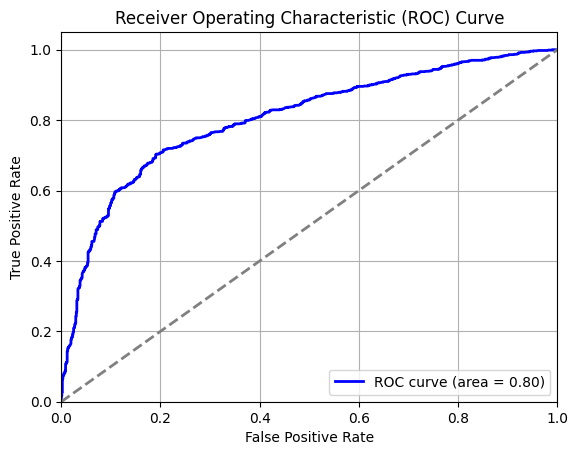

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_test_gb = gb_clf_updated.predict_proba(X_test)[:,1]
fpr, tpr, threshs = roc_curve(y_test,y_prob_test_gb)
roc_auc = roc_auc_score(y_test, y_prob_test_gb)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Conclusion

We trained different ML models to predict whether a potential client subscribes to a term deposit or not. The GradientBoostingClassifier offers the best results with 74% accuracy. The area under curve (AUC) is 80% which indicates that the classifier performs 60% better than a random classifier (0.8/0.5). Also the recall for this classifier is 62% which means that our method detects 62 percent of potential clients who may sunscribe for the service.